<a href="https://colab.research.google.com/github/KaziRuholKabir/my_Projects/blob/main/CSE445_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. The data is used for Titanic. I have to get the prediction of survival rate from this data. In this dataset there are several columns. There are Passenger class, name, Sex, Age, SibSp, Parch, Ticket id, fare, cabin and embarked. 

I have got this data from tha kaggle website.(https://www.kaggle.com/c/titanic/data )

In [36]:
import pandas as pd


In [39]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [40]:
import io
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [41]:
train_df.loc[(train_df["Age"]<16) & (train_df["Sex"] == 'male') ].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 7 to 869
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  40 non-null     int64  
 1   Survived     40 non-null     int64  
 2   Pclass       40 non-null     int64  
 3   Name         40 non-null     object 
 4   Sex          40 non-null     object 
 5   Age          40 non-null     float64
 6   SibSp        40 non-null     int64  
 7   Parch        40 non-null     int64  
 8   Ticket       40 non-null     object 
 9   Fare         40 non-null     float64
 10  Cabin        7 non-null      object 
 11  Embarked     40 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 4.1+ KB


In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train_df.info()
print('-'*20)
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending = False))
print('-'*20)
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending = False))
print('-'*20)
print(train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending = False))
print('-'*20)
print(train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending = False))
print('-'*20)

import seaborn as sns
import matplotlib.pyplot as plt



   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
--------------------


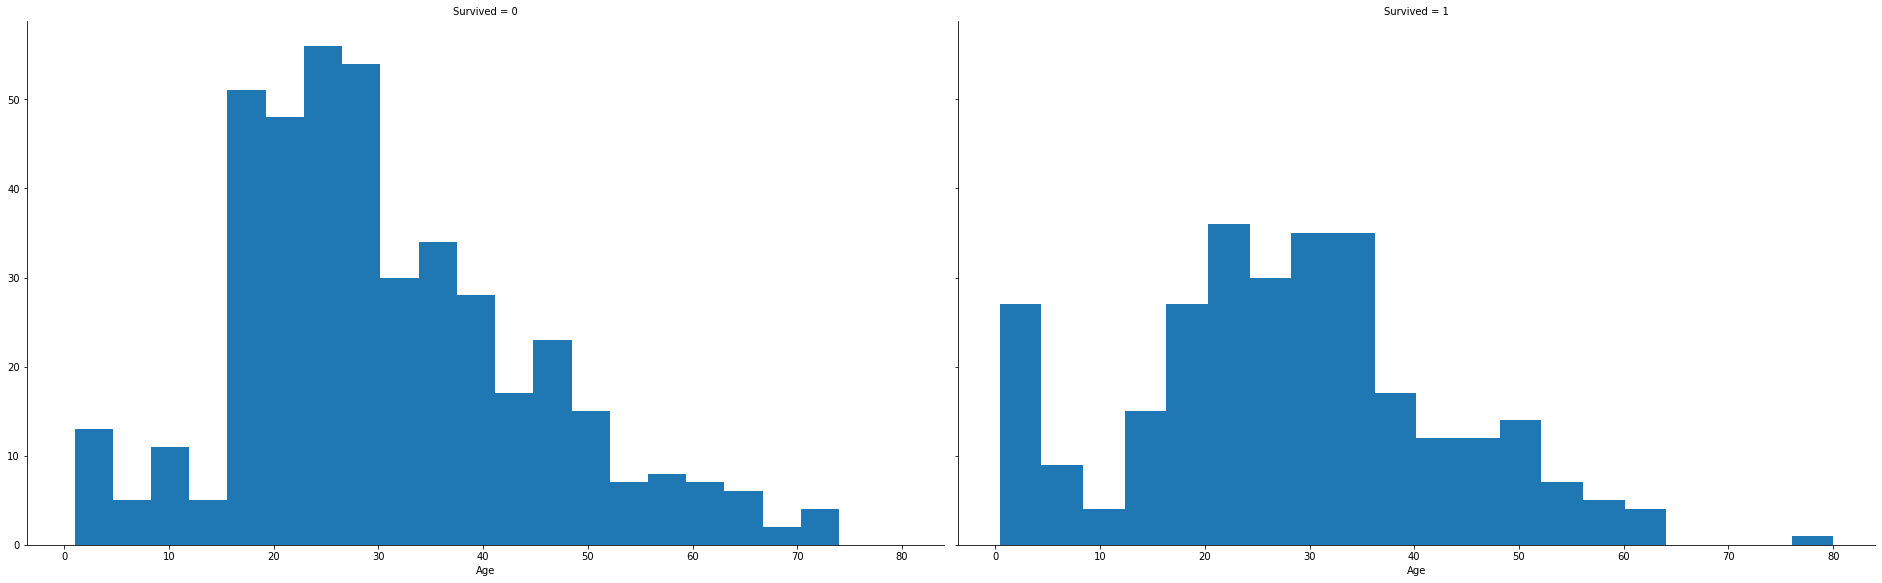

In [45]:

g = sns.FacetGrid(train_df, col='Survived', height = 8.2, aspect = 1.6)
g.map(plt.hist, 'Age', bins=20)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

y=train_df["Survived"]
features = ["Pclass","Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])

model.fit(X, y)
scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())
print('ROC AUC: %0.3f' % model.score(X,y))

0.7991400414286611
ROC AUC: 0.816


In [47]:
train_df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [48]:
import plotly.graph_objs as go 
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore') 


S = train_df[train_df['Survived']==1]
D = train_df[train_df['Survived']==0]

def plot_distribution(var_select, title) :  
    tmp1 = S[var_select]
    tmp2 = D[var_select]
    
    trace0 = go.Histogram(
        x=tmp1, opacity=1, name='Survived', marker=dict(
        color='lightblue')
    )
    trace1 = go.Histogram(
        x=tmp2, opacity=1, name='Died', marker=dict(
        color='pink')
    )
    
    data = [trace0, trace1]
    layout = go.Layout(barmode='stack', title = title,
                  autosize = True,
                  height  = 500,
                  width   = 800,
                  
                  xaxis=dict(), 
                  yaxis=dict(title= 'Count'), 
                  yaxis2=dict(range= [-0, 75], 
                              overlaying= 'y', 
                              anchor= 'x', 
                              side= 'right',
                              zeroline=False,
                              showgrid= False, 
                              title= '% Died'
                             ),
                 legend=dict(x=-.1, y=1.5),
                 margin=go.layout.Margin(
                    b=0))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename = 'Density plot')

In [50]:

test_df['Type'] = 2 
train_df['Type'] = 1 
combine = [train_df, test_df]
df = pd.concat(combine)


 


fa = df[df["Pclass"]==3]
df['Fare'].fillna(fa['Fare'].median(), inplace = True)

df.loc[(df.Embarked.isnull()) ,'Embarked'] = 'S'


df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

mapping = {'Mlle': 'Miss', 
           'Ms': 'Miss', 
           'Mme': 'Mrs',
           'Major': 'Other', 
           'Col': 'Other', 
           'Dr' : 'Other', 
           'Rev' : 'Other',
           'Capt': 'Other', 
           'Jonkheer': 'Royal',
           'Sir': 'Royal', 
           'Lady': 'Royal', 
           'Don': 'Royal',
           'Countess': 'Royal', 
           'Dona': 'Royal'}
df.replace({'Title': mapping}, inplace=True)
titles = ['Miss', 'Mr', 'Mrs', 'Royal', 'Other', 'Master']

for title in titles:
    age_to_impute = df.groupby('Title')['Age'].median()[titles.index(title)]
    df.loc[(df['Age'].isnull()) & (df['Title'] == title), 'Age'] = age_to_impute


df['Family_Size'] = df['Parch'] + df['SibSp'] + 1
df.loc[:,'FsizeD']='Alone'
df.loc[(df['Family_Size']>1),'FsizeD']='Small'
df.loc[(df['Family_Size']>4),'FsizeD']='Big'

df.loc[:,'Child']=1
df.loc[(df['Age']>=18),'Child']=0


df['Last_Name'] = df['Name'].apply(lambda x: str.split(x, ",")[0])

DEFAULT_SURVIVAL_VALUE = 0.5
df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
       
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      df.loc[df['Family_Survival']!=0.5].shape[0])

for _, grp_df in df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(df[df['Family_Survival']!=0.5].shape[0]))


df['Name_Length'] = df['Name'].apply(lambda x:  len(x)>=32)

Number of passengers with family survival information: 420
Number of passenger with family/group survival information: 546


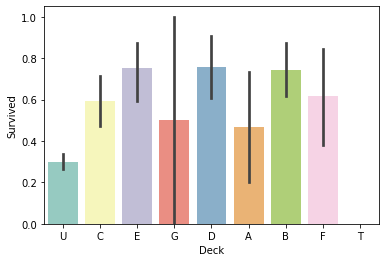

In [51]:


df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Deck']= df['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=df, palette='Set3')



In [52]:


df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   object 
 5   Age              1309 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1309 non-null   float64
 10  Cabin            1309 non-null   object 
 11  Embarked         1309 non-null   object 
 12  Type             1309 non-null   int64  
 13  Title            1309 non-null   object 
 14  Family_Size      1309 non-null   int64  
 15  FsizeD           1309 non-null   object 
 16  Child            1309 non-null   int64  
 17  Last_Name      

In [53]:
df_new = df.drop(['SibSp','Parch','Name','Ticket','Cabin','Last_Name'],axis=1)
trans_df = pd.get_dummies(df_new)

In [54]:
train_df = trans_df.loc[ trans_df['Type'] == 1, :] 
test_df = trans_df.loc[ trans_df['Type'] == 2, :] 
y = train_df["Survived"]
X = train_df.drop(['Survived','PassengerId','Type'],axis=1)

from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=16)
X_new.fit_transform(X, y) 
cols = X_new.get_support(indices=True)

X = X.iloc[:,cols]
X.head()

,Pclass,Fare,Child,Family_Survival,Name_Length,Sex_female,Sex_male,Embarked_C,Title_Miss,Title_Mr,Title_Mrs,FsizeD_Small,Deck_B,Deck_D,Deck_E,Deck_U
0,3,7.2500,0,0.5,False,0,1,0,0,1,0,1,0,0,0,1
1,1,71.2833,0,0.5,True,1,0,1,0,0,1,1,0,0,0,0
2,3,7.9250,0,0.5,False,1,0,0,1,0,0,0,0,0,0,1
3,1,53.1000,0,0.0,True,1,0,0,0,0,1,1,0,0,0,0
4,3,8.0500,0,0.5,False,0,1,0,0,1,0,0,0,0,0,1


In [55]:
print(X.columns.values)

['Pclass' 'Fare' 'Child' 'Family_Survival' 'Name_Length' 'Sex_female'
 'Sex_male' 'Embarked_C' 'Title_Miss' 'Title_Mr' 'Title_Mrs'
 'FsizeD_Small' 'Deck_B' 'Deck_D' 'Deck_E' 'Deck_U']


In [62]:
train_df = trans_df.loc[ trans_df['Type'] == 1, :] 
test_df = trans_df.loc[ trans_df['Type'] == 2, :] 
 
train_df.describe()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression



model2 = RandomForestClassifier(n_estimators=200,min_samples_leaf=5)

model2.fit(X, y)
scores = cross_val_score(model2, X, y, cv=5)
print(scores.mean())
print ('ROC AUC: %0.3f' % model2.score(X, y) )

X_test = test_df.drop(['Survived','PassengerId','Type'],axis=1)[X.columns.values]
predictions = model2.predict(X_test)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output['Survived'] = output['Survived'].apply(lambda x: int(x))
output.to_csv('survived_result1.csv', index=False)
print("Your submission was successfully saved!")

0.84509446990145
ROC AUC: 0.865
Your submission was successfully saved!


In [63]:
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
log = LogisticRegression(penalty = 'l2',solver = 'liblinear', C = 0.25)
xgb = XGBClassifier(learning_rate=0.01 ,
                                                              n_estimators=860,
                                                              max_depth=3,
                                                              subsample=1,
                                                              colsample_bytree=1,
                                                              gamma=6,
                                                              reg_alpha = 14,
                                                              reg_lambda = 3)
classifier = VotingClassifier(estimators=[('XGB', xgb),('log', log)])
classifier.fit(X, y)
accuracies = cross_val_score(classifier, X, y , cv = 5)
print("5 fold cross validation accuracies {}".format(accuracies.mean()))
X_test = test_df.drop(['Survived','PassengerId','Type'],axis=1)[X.columns.values]
predictions = classifier.predict(X_test)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output['Survived'] = output['Survived'].apply(lambda x: int(x))
output.to_csv('survived_result2.csv', index=False)

5 fold cross validation accuracies 0.8484652564183038


In [64]:
from google.colab import files
files.download('survived_result1.csv')
files.download('survived_result2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>